In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('Titanic.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [ ]:
df['Cabin_null'] = np.where(df['Cabin'].isnull(),1,0)

In [ ]:
df.loc[df['Cabin_null']==1].count()/(len(df))

PassengerId    0.771044
Survived       0.771044
Pclass         0.771044
Name           0.771044
Sex            0.771044
Age            0.593715
SibSp          0.771044
Parch          0.771044
Ticket         0.771044
Fare           0.771044
Cabin          0.000000
Embarked       0.771044
Cabin_null     0.771044
dtype: float64

In [ ]:
df.Cabin_null

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    1
889    0
890    1
Name: Cabin_null, Length: 891, dtype: int64

In [ ]:
df.groupby(['Survived'])['Cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_null, dtype: float64

**Techiniques to handle missing values**
1. Replacing with Mean/mode/median
2. Random sampling imputation
3. Capturing NAN values with new feature
4. End of distribution impution
5. Arbitrary imputation
6. Frequent categories imputation


**Mean/Mode/Median imputation**

1. It has assumption that data missing completely at random(MCAR)
2. Solve this by replacing NAN values by most frequent category


In [ ]:
data = pd.read_csv('Titanic.csv',usecols=['Age','Fare','Survived'])
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
data.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [ ]:
age_median = data.Age.median()
age_median

28.0

In [ ]:
#impute null values in age with median

data['Age_median'] = data['Age'].fillna(age_median)

In [ ]:
data.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [ ]:
data.Age_median.isnull().sum()

0

In [ ]:
# check for standard deviation change

print(data.Age.std())
print(data.Age_median.std())

14.526497332334042
13.019696550973201


In [ ]:
import matplotlib.pyplot as plt


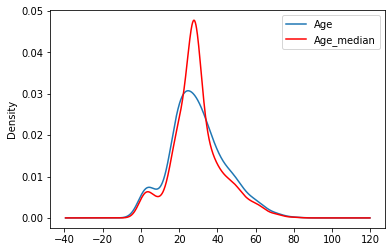

In [ ]:
fig = plt.figure() 
ax = fig.add_subplot(111) 
data['Age'].plot(kind='kde', ax=ax) 
data.Age_median.plot(kind='kde', ax=ax, color='red') 
lines, labels = ax.get_legend_handles_labels()
plt.legend()

In [ ]:
## Advantages
# 1. Easy to implement (Robust to outliers)
# 2. Fast way to obtain complete dataset

## Disadvantages

# 1. Distortion in the original variance of data
# 2. Imbalanced dataset
# 3. Impacts correlation

###RandomSample Imputation

Random sampling imputation consists of taking random observations from the datatset and use them to replace missing values

This process assumes data is missing completey at random(MCAR)

In [ ]:
data1 = pd.read_csv('Titanic.csv',usecols=['Age','Fare','Survived'])
data1.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
data1.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [ ]:
data1.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [ ]:
#filling random sampled values in NAN 
random_sample = data1.Age.dropna().sample(data1.Age.isnull().sum(),random_state=1)
random_sample

689    15.0
278     7.0
506    33.0
9      14.0
494    21.0
       ... 
66     29.0
40     40.0
322    30.0
597    49.0
436    21.0
Name: Age, Length: 177, dtype: float64

In [ ]:
random_sample.index = data1[data1.Age.isnull()].index

In [ ]:
random_sample.index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [ ]:
data1['Age_random_sample'] = data1.Age

In [ ]:
data1.loc[data1.Age.isnull(),'Age_random_sample'] = random_sample

In [ ]:
data1['Age_random_sample'] = data1['Age_random_sample'].fillna(random_sample)

In [ ]:
data1.head()

,Survived,Age,Fare,Age_random_sample
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [ ]:
data1.isnull().sum()

Survived               0
Age                  177
Fare                   0
Age_random_sample      0
dtype: int64

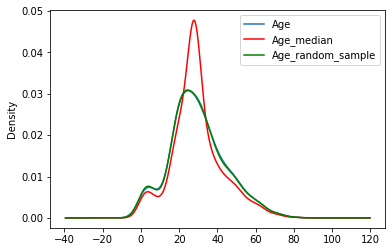

In [ ]:
fig = plt.figure() 
ax = fig.add_subplot(111) 
data1['Age'].plot(kind='kde', ax=ax) 
data.Age_median.plot(kind='kde', ax=ax, color='red') 
data1['Age_random_sample'].plot(kind='kde', ax=ax,color='green') 
##lines, labels = ax.get_legend_handles_labels()
plt.legend()
plt.show()

In [ ]:
# Advantages
#1. easy to implement
# 2.  distortion in Variance is less


# Disadvantage

# 1. in every situation randomness won't work

#### Capturing NAN values with new feature
works well when the data is not missing completey at random

In [ ]:
data2 = pd.read_csv('Titanic.csv',usecols=['Age','Fare','Survived'])
data2.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
# create new feature and  replace NAN values with 1 and dta with 0
data2['Age_NAN'] = np.where(data2.Age.isnull(),1,0)

In [ ]:
data2.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [ ]:
# Advantages
# 1. easy to implement
#2. captures importance of missing values

# disadvantages
# Creating additional feature for each feature with missing values (Leads to curse of dimensionality

#### End of distribution imputation

Replace NAN value with the value present at end of distribution of the feature

In [ ]:
data3 = pd.read_csv('Titanic.csv',usecols=['Age','Fare','Survived'])
data3.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


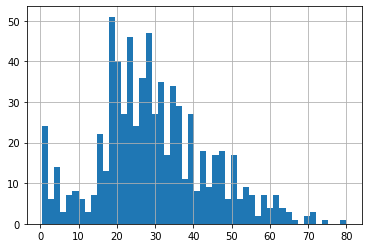

In [ ]:
data3.Age.hist(bins=50)

In [ ]:
#picking the value at 3rd std deviation
extreme =data3.Age.mean() + 3*data3.Age.std()

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


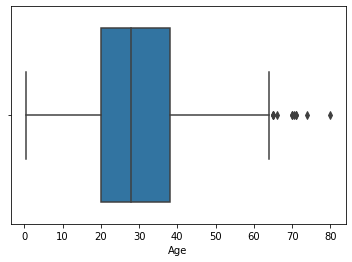

In [ ]:
sns.boxplot(data3.Age)

In [ ]:
data3['Age_end_distribution'] = data3.Age.fillna(extreme)
data3.head()


,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [ ]:
data3.isnull().sum()

Survived                  0
Age                     177
Fare                      0
Age_end_distribution      0
dtype: int64

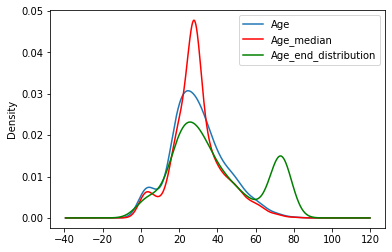

In [ ]:
fig = plt.figure() 
ax = fig.add_subplot(111) 
data3['Age'].plot(kind='kde', ax=ax) 
data.Age_median.plot(kind='kde', ax=ax, color='red') 
data3['Age_end_distribution'].plot(kind='kde', ax=ax,color='green') 
##lines, labels = ax.get_legend_handles_labels()
plt.legend()
plt.show()

In [ ]:
#

#### Advantages
1. Easy to implement
2. Captures the importance of the missingness if there is one

#### Disadvantages

1. Distorts the original distribution of variable
2. If missingness is not important it may mask the predictive power if the original variable by distorting its distribution
3. If num of NAN values is big it will mask outliers in the distribution
4. If num of NAN is small then replaced value will be considered as outlier and preprocessed in subsequent steps of feature engineering

#### Arbitrary value imputation
Replacing NAN values with arbitrary value

Value should not be present more frequently

In [ ]:
data4 = pd.read_csv('Titanic.csv',usecols=['Age','Fare','Survived'])
data4.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
data4['Age_zero'] = data4.Age.fillna(0)
data4['Age_hundred'] = data4.Age.fillna(100)

In [ ]:
data4.head()

,Survived,Age,Fare,Age_zero,Age_hundred
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


####Advantages
1. Easy to implement
2. CAptures importance of missingness if any

####Disadvantages
1. Distorts the original distribution of values
2. If missingness is not important it may mask the predictive power of the original variable
3. Hard to decide which value to use